In [ ]:
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
T = 1
m = 10000
n = 10000

In [ ]:
# Gerar m caminhos do movimento Browniano
W = np.zeros((m, n))
for path in range(m):
    dW = np.random.normal(0, np.sqrt(T/n), n-1)
    W[path, 1:] = np.cumsum(dW)

# Calcular a aproximação da integral
integral_approx = np.zeros(m)

for path in range(m):
    for j in range(1, n):
        integral_approx[path] += W[path, j-1] * (W[path, j] - W[path, j-1])

# Calcular (W_T^2)/2 - T/2
WT2_over_2_minus_T_over_2 = (W[:, -1]**2)/2 - T/2

# Gerar valores da distribuição Gama usando a relação com a Normal
#Z = np.random.normal(0, 1/np.sqrt(2), m)
#Z = np.random.normal(0, 1, m)
#gamma_values = Z**2
#pdf_wt2 = -T/2 + gamma_values/2


gamma_values = np.random.gamma(1/2 , scale=2*T, size=m)

gamma_dpf = -T/2 + 1/2*(gamma_values)

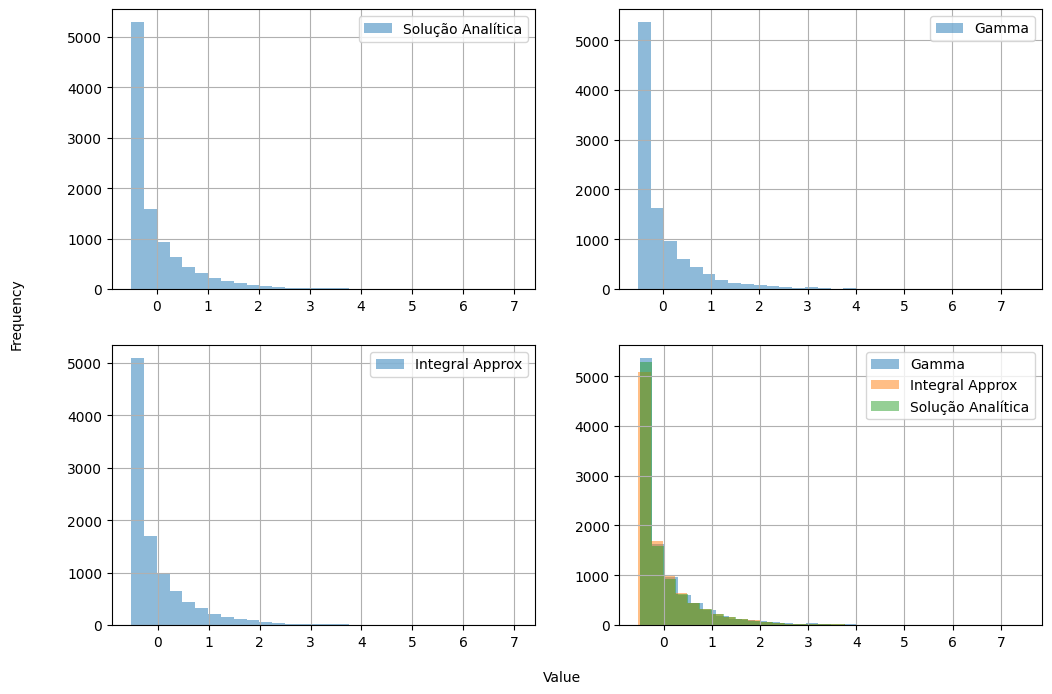

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Histograma 1: Solução Analítica
axes[0, 0].hist(WT2_over_2_minus_T_over_2, bins=30, alpha=0.5, label="Solução Analítica")
axes[0, 0].legend(loc='upper right')
axes[0, 0].grid(True)

# Histograma 2: Aproximação
axes[1, 0].hist(integral_approx, bins=30, alpha=0.5, label="Integral Approx")
axes[1, 0].legend(loc='upper right')
axes[1, 0].grid(True)

# Histograma 3: Aproximação Gamma
axes[0, 1].hist(gamma_dpf, bins=30, alpha=0.5, label="Gamma")
axes[0, 1].legend(loc='upper right')
axes[0, 1].grid(True)

# Histograma 4: Comparação
axes[1, 1].hist(gamma_dpf, bins=30, alpha=0.5, label="Gamma")
axes[1, 1].hist(integral_approx, bins=30, alpha=0.5, label="Integral Approx")
axes[1, 1].hist(WT2_over_2_minus_T_over_2, bins=30, alpha=0.5, label="Solução Analítica")
axes[1, 1].legend(loc='upper right')
axes[1, 1].grid(True)

# Ajustando os labels e o título
fig.text(0.5, 0.04, 'Value', ha='center')
fig.text(0.04, 0.5, 'Frequency', va='center', rotation='vertical')

# Exibindo os gráficos
plt.show()